In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('nogales.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL
0,24/01/2018,17:00,113,129,16.00,31.9,14.0,18.0,879.2,0.0,620.2
1,24/01/2018,18:00,112,123,16.86,31.9,15.6,17.0,878.7,0.0,729.2
2,24/01/2018,19:00,125,141,16.56,33.1,17.1,16.0,877.7,0.0,768.3
3,24/01/2018,20:00,138,138,14.59,30.3,18.0,16.0,876.7,0.0,738.0
4,24/01/2018,21:00,125,176,14.35,36.5,18.9,16.0,876.0,0.0,630.2


In [4]:
# Lee los primeros 5 renglones del archivo
df0.head(10)
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL
0,24/01/2018,17:00,113,129,16.00,31.9,14.0,18.0,879.2,0.0,620.2
1,24/01/2018,18:00,112,123,16.86,31.9,15.6,17.0,878.7,0.0,729.2
2,24/01/2018,19:00,125,141,16.56,33.1,17.1,16.0,877.7,0.0,768.3
3,24/01/2018,20:00,138,138,14.59,30.3,18.0,16.0,876.7,0.0,738.0
4,24/01/2018,21:00,125,176,14.35,36.5,18.9,16.0,876.0,0.0,630.2
5,24/01/2018,22:00,114,127,17.03,32.2,19.1,16.0,875.6,0.0,460.7
6,24/01/2018,23:00,105,153,15.35,29.7,19.2,16.0,875.4,0.0,253.2
7,25/01/2018,00:00,111,128,17.21,32.8,17.6,17.0,875.7,0.0,65.0
8,25/01/2018,01:00,115,130,20.51,37.4,15.9,18.0,875.8,0.0,0.2
9,25/01/2018,02:00,107,130,11.23,23.2,14.5,20.0,876.0,0.0,0.0


In [5]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [6]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RAD-SOL       float64
dtype: object

In [7]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1))
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [8]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL,FECHA
0,113,129,16.00,31.9,14.0,18.0,879.2,0.0,620.2,2018-01-24 17:00:00
1,112,123,16.86,31.9,15.6,17.0,878.7,0.0,729.2,2018-01-24 18:00:00
2,125,141,16.56,33.1,17.1,16.0,877.7,0.0,768.3,2018-01-24 19:00:00
3,138,138,14.59,30.3,18.0,16.0,876.7,0.0,738.0,2018-01-24 20:00:00
4,125,176,14.35,36.5,18.9,16.0,876.0,0.0,630.2,2018-01-24 21:00:00


In [9]:
df.dtypes

DIRS                int64
DIRR                int64
VELS              float64
VELR              float64
TEMP              float64
HR                float64
PB                float64
PREC              float64
RAD-SOL           float64
FECHA      datetime64[ns]
dtype: object

In [10]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL
count,168.000000,168.000000,168.000000,168.000000,168.000000,167.000000,167.000000,167.000000,166.000000
mean,152.886905,189.726190,9.359345,20.452381,13.804167,28.444311,871.532335,0.898204,206.538554
std,85.105037,96.665774,6.917015,12.376533,5.637517,66.372437,67.871412,11.607348,289.660749
min,3.000000,51.000000,0.180000,4.500000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,91.000000,107.750000,3.595000,9.575000,9.800000,16.000000,875.350000,0.000000,0.000000
50%,112.000000,138.500000,7.960000,19.050000,13.700000,21.000000,876.600000,0.000000,0.000000
75%,235.000000,271.750000,14.290000,28.300000,18.300000,29.000000,878.200000,0.000000,459.350000
max,353.000000,360.000000,34.660000,63.500000,26.000000,875.200000,881.700000,150.000000,786.300000


In [11]:
#
#
#Aquí inicia la practica con los datos de La Primavera, Jalisco
#
#

In [12]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [13]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('LaPrimavera.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [14]:
# Lee los primeros 5 renglones del archivo
df0.head(5)
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
0,25/01/2018,22:00,44.0,41.0,4.59,16.9,19.8,56.0,853.3,0.0,229.0,22.2,56.0,1.0,16.2
1,25/01/2018,23:00,38.0,36.0,4.56,15.1,18.3,64.0,853.4,0.0,50.5,19.0,56.0,1.0,16.3
2,26/01/2018,00:00,28.0,42.0,2.62,8.6,16.4,74.0,853.7,0.0,15.0,16.6,62.0,1.0,16.4
3,26/01/2018,01:00,18.0,24.0,4.35,11.9,14.6,82.0,854.1,0.0,0.0,14.2,69.0,1.0,16.6
4,26/01/2018,02:00,35.0,17.0,5.36,13.0,13.8,85.0,854.8,0.0,0.0,13.5,74.0,1.0,16.7


In [15]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [16]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS          float64
DIRR          float64
VELS          float64
VELR          float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RADSOL        float64
TEMPCOMB      float64
HUMCOMB       float64
HUMSUBS       float64
TEMPSUBS      float64
dtype: object

In [17]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1),dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [18]:
df.head(7)

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA
0,44.0,41.0,4.59,16.9,19.8,56.0,853.3,0.0,229.0,22.2,56.0,1.0,16.2,2018-01-25 22:00:00
1,38.0,36.0,4.56,15.1,18.3,64.0,853.4,0.0,50.5,19.0,56.0,1.0,16.3,2018-01-25 23:00:00
2,28.0,42.0,2.62,8.6,16.4,74.0,853.7,0.0,15.0,16.6,62.0,1.0,16.4,2018-01-26 00:00:00
3,18.0,24.0,4.35,11.9,14.6,82.0,854.1,0.0,0.0,14.2,69.0,1.0,16.6,2018-01-26 01:00:00
4,35.0,17.0,5.36,13.0,13.8,85.0,854.8,0.0,0.0,13.5,74.0,1.0,16.7,2018-01-26 02:00:00
5,86.0,47.0,3.49,8.6,12.9,91.0,855.3,0.0,0.0,12.1,78.0,1.0,16.7,2018-01-26 03:00:00
6,85.0,96.0,3.71,7.2,11.2,99.0,855.7,0.0,0.0,10.5,81.0,1.0,16.6,2018-01-26 04:00:00


In [19]:
df.dtypes

DIRS               float64
DIRR               float64
VELS               float64
VELR               float64
TEMP               float64
HR                 float64
PB                 float64
PREC               float64
RADSOL             float64
TEMPCOMB           float64
HUMCOMB            float64
HUMSUBS            float64
TEMPSUBS           float64
FECHA       datetime64[ns]
dtype: object

In [20]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,105.874251,109.748503,5.355509,17.105988,15.028144,62.562874,853.723353,0.056287,122.010180,15.137126,66.574850,0.532934,15.650898
std,84.686180,86.919414,3.111111,9.537483,4.978664,23.454274,1.782409,0.349103,210.660269,6.645421,24.448226,0.500415,0.842820
min,5.000000,13.000000,0.830000,5.000000,8.500000,24.000000,848.800000,0.000000,0.000000,7.400000,18.000000,0.000000,14.000000
25%,51.500000,51.000000,3.135000,9.550000,11.250000,42.000000,852.600000,0.000000,0.000000,10.500000,47.000000,0.000000,15.000000
50%,75.000000,75.000000,4.460000,14.400000,13.300000,59.000000,853.800000,0.000000,0.200000,12.600000,66.000000,1.000000,15.600000
75%,120.500000,144.000000,7.190000,24.500000,17.900000,85.500000,854.950000,0.000000,180.750000,18.800000,90.500000,1.000000,16.300000
max,355.000000,352.000000,16.120000,43.600000,27.400000,100.000000,857.300000,3.800000,803.700000,34.100000,100.000000,1.000000,17.300000


In [21]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 30]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA
21,33.0,13.0,1.24,13.7,25.3,36.0,853.6,0.0,734.8,29.0,30.0,1.0,15.5,2018-01-26 19:00:00
22,250.0,208.0,3.59,14.8,25.8,33.0,852.4,0.0,632.5,31.2,29.0,1.0,15.7,2018-01-26 20:00:00
23,204.0,147.0,1.11,15.1,26.4,28.0,851.4,0.0,618.3,34.1,23.0,1.0,16.0,2018-01-26 21:00:00
24,276.0,292.0,4.31,14.8,26.4,28.0,850.8,0.0,432.2,31.7,18.0,1.0,16.2,2018-01-26 22:00:00
44,287.0,352.0,4.22,15.5,25.6,35.0,852.9,0.0,774.2,34.0,31.0,1.0,15.4,2018-01-27 18:00:00
45,56.0,40.0,4.32,16.6,27.4,29.0,851.7,0.0,803.7,31.7,24.0,1.0,15.6,2018-01-27 19:00:00
46,105.0,114.0,1.38,9.7,26.2,31.0,850.5,0.0,304.0,28.9,25.0,1.0,15.8,2018-01-27 20:00:00
47,104.0,32.0,1.27,18.0,26.9,27.0,849.4,0.0,551.8,33.9,21.0,1.0,16.2,2018-01-27 21:00:00
48,85.0,75.0,1.06,15.1,27.3,28.0,848.8,0.0,321.0,32.5,18.0,1.0,16.4,2018-01-27 22:00:00
69,59.0,51.0,7.96,25.2,25.6,34.0,852.3,0.0,770.7,25.6,100.0,0.0,15.1,2018-01-28 19:00:00


In [22]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS        105.874251
DIRR        109.748503
VELS          5.355509
VELR         17.105988
TEMP         15.028144
HR           62.562874
PB          853.723353
PREC          0.056287
RADSOL      122.010180
TEMPCOMB     15.137126
HUMCOMB      66.574850
HUMSUBS       0.532934
TEMPSUBS     15.650898
dtype: float64

In [23]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

15.028143712574854

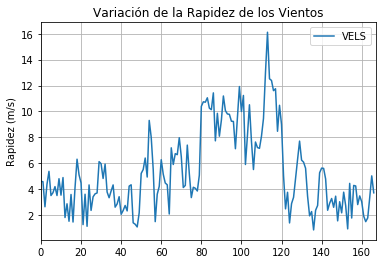

In [24]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

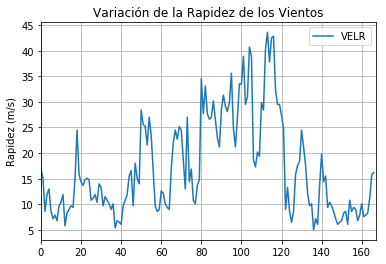

In [25]:
plt.figure(); df.VELR.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

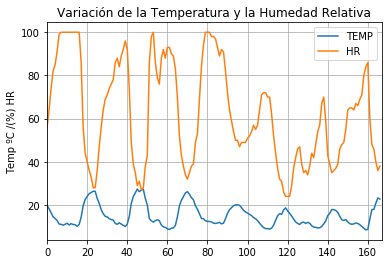

In [26]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

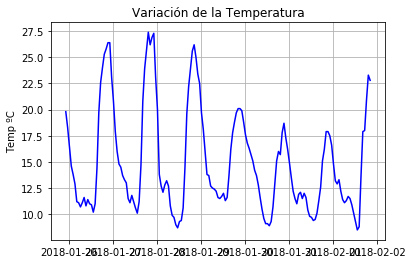

In [27]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

In [28]:
#
#
#Actividades adicionales
#
#

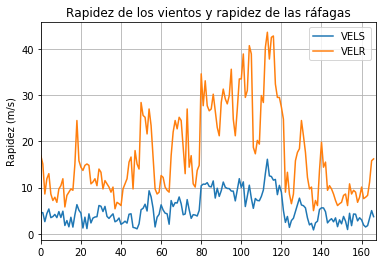

In [29]:
# Gráfica de la rapidez de los vientos y la rapidez de las ráfagas, como funciones del tiempo.
df1 = df[['VELS','VELR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Rapidez de los vientos y rapidez de las ráfagas")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

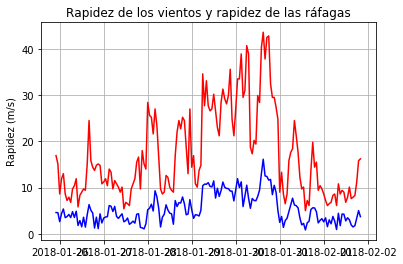

In [30]:
# Gráfica de la rapidez de los vientos y la rapidez de las ráfagas, como funciones del tiempo.
plt.plot_date(x=df.FECHA, y=df.VELS, fmt="b-")
plt.plot_date(x=df.FECHA, y=df.VELR, fmt="r-")
plt.title("Rapidez de los vientos y rapidez de las ráfagas")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

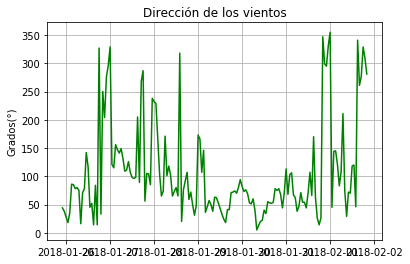

In [31]:
# Gráfica de la dirección de los vientos como función del tiempo.
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="g-")
plt.title("Dirección de los vientos")
plt.ylabel("Grados(°)")
plt.grid(True)
plt.show()

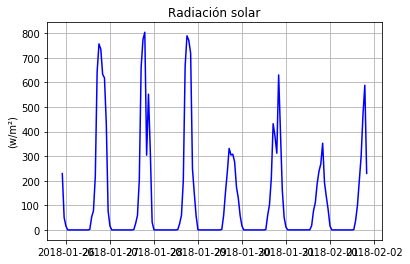

In [32]:
# Gráfica de la radiación solar como función del tiempo.
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="b-")
plt.title("Radiación solar")
plt.ylabel("(w/m²)")
plt.grid(True)
plt.show()

In [33]:
df.TEMP.describe()

count    167.000000
mean      15.028144
std        4.978664
min        8.500000
25%       11.250000
50%       13.300000
75%       17.900000
max       27.400000
Name: TEMP, dtype: float64

In [34]:
df.TEMP.max()-df.TEMP.min()

18.899999999999999

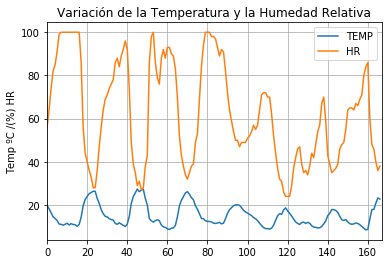

In [35]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

In [36]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,105.874251,109.748503,5.355509,17.105988,15.028144,62.562874,853.723353,0.056287,122.010180,15.137126,66.574850,0.532934,15.650898
std,84.686180,86.919414,3.111111,9.537483,4.978664,23.454274,1.782409,0.349103,210.660269,6.645421,24.448226,0.500415,0.842820
min,5.000000,13.000000,0.830000,5.000000,8.500000,24.000000,848.800000,0.000000,0.000000,7.400000,18.000000,0.000000,14.000000
25%,51.500000,51.000000,3.135000,9.550000,11.250000,42.000000,852.600000,0.000000,0.000000,10.500000,47.000000,0.000000,15.000000
50%,75.000000,75.000000,4.460000,14.400000,13.300000,59.000000,853.800000,0.000000,0.200000,12.600000,66.000000,1.000000,15.600000
75%,120.500000,144.000000,7.190000,24.500000,17.900000,85.500000,854.950000,0.000000,180.750000,18.800000,90.500000,1.000000,16.300000
max,355.000000,352.000000,16.120000,43.600000,27.400000,100.000000,857.300000,3.800000,803.700000,34.100000,100.000000,1.000000,17.300000
